In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [230]:
import os

In [231]:
import os
os.getcwd()

'C:\\Users\\hp\\4.STATS_&_ML_by_Sundaram_sir\\Muffassil\\Logistic_regression\\Model_2'

In [232]:
df=pd.read_csv("German Credit Data.csv")
df.head()

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


In [234]:
df.describe()

,duration,amount,inst_rate,residing_since,age,num_credits,status
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,0.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,1.000000


In [235]:
# 1)missing data are not found


In [236]:
# 2) outlier treatment is non-significant activities in logistic regression

In [237]:
# 3) Encoding
df.head()

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


In [238]:
df.describe(include='O')

,checkin_acc,credit_history,savings_acc,present_emp_since,personal_status,inst_plans,job
count,1000,1000,1000,1000,1000,1000,1000
unique,4,5,5,5,4,3,4
top,A14,A32,A61,A73,A93,A143,A173
freq,394,530,603,339,548,814,630


In [239]:
df.checkin_acc.value_counts()

A14    394
A11    274
A12    269
A13     63
Name: checkin_acc, dtype: int64

In [240]:
pd.set_option('display.max_columns', None) # display all columns

In [241]:
cat_col=['checkin_acc','credit_history','savings_acc','present_emp_since','personal_status','inst_plans','job']

In [242]:
df=pd.get_dummies(columns=cat_col, data=df, drop_first=True)

In [243]:
df.columns

Index(['duration', 'amount', 'inst_rate', 'residing_since', 'age',
       'num_credits', 'status', 'checkin_acc_A12', 'checkin_acc_A13',
       'checkin_acc_A14', 'credit_history_A31', 'credit_history_A32',
       'credit_history_A33', 'credit_history_A34', 'savings_acc_A62',
       'savings_acc_A63', 'savings_acc_A64', 'savings_acc_A65',
       'present_emp_since_A72', 'present_emp_since_A73',
       'present_emp_since_A74', 'present_emp_since_A75', 'personal_status_A92',
       'personal_status_A93', 'personal_status_A94', 'inst_plans_A142',
       'inst_plans_A143', 'job_A172', 'job_A173', 'job_A174'],
      dtype='object')

In [244]:
df=df[['status','duration', 'amount', 'inst_rate', 'residing_since', 'age',
       'num_credits', 'checkin_acc_A12', 'checkin_acc_A13',
       'checkin_acc_A14', 'credit_history_A31', 'credit_history_A32',
       'credit_history_A33', 'credit_history_A34', 'savings_acc_A62',
       'savings_acc_A63', 'savings_acc_A64', 'savings_acc_A65',
       'present_emp_since_A72', 'present_emp_since_A73',
       'present_emp_since_A74', 'present_emp_since_A75', 'personal_status_A92',
       'personal_status_A93', 'personal_status_A94', 'inst_plans_A142',
       'inst_plans_A143', 'job_A172', 'job_A173', 'job_A174']]

<AxesSubplot:>

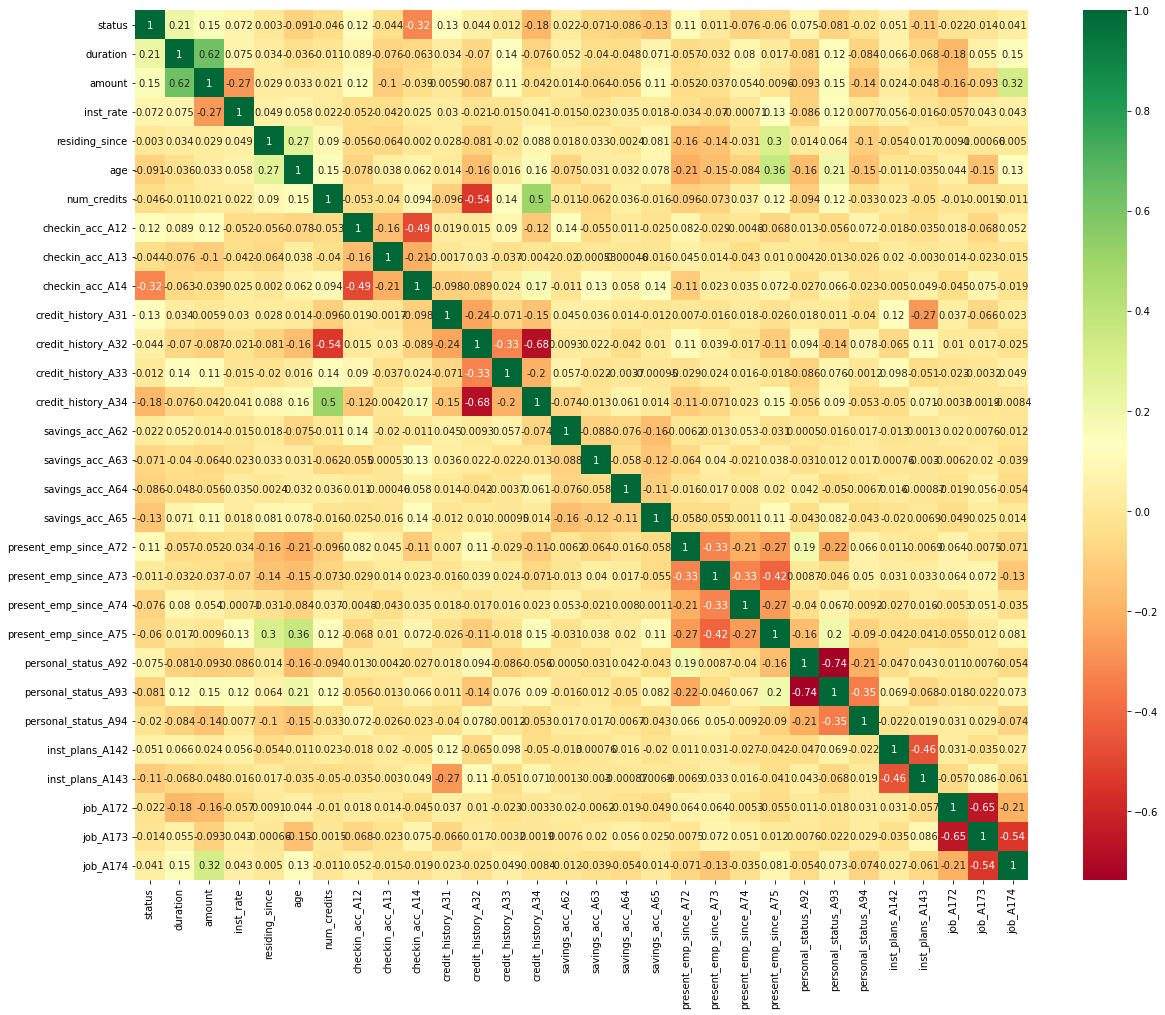

In [245]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

In [246]:
X=df.iloc[:, 1:]
X

,duration,amount,inst_rate,residing_since,age,num_credits,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,credit_history_A31,credit_history_A32,credit_history_A33,credit_history_A34,savings_acc_A62,savings_acc_A63,savings_acc_A64,savings_acc_A65,present_emp_since_A72,present_emp_since_A73,present_emp_since_A74,present_emp_since_A75,personal_status_A92,personal_status_A93,personal_status_A94,inst_plans_A142,inst_plans_A143,job_A172,job_A173,job_A174
0,6,1169,4,4,67,2,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0
1,48,5951,2,2,22,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,12,2096,2,3,49,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0
3,42,7882,2,4,45,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0
4,24,4870,3,4,53,2,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0
996,30,3857,4,4,40,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
997,12,804,4,4,38,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0
998,45,1845,4,4,23,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0


In [247]:
y=df.iloc[:, [0]]
y

,status
0,0
1,1
2,0
3,0
4,1
...,...
995,0
996,0
997,0
998,1


In [248]:
col=X.columns
col

Index(['duration', 'amount', 'inst_rate', 'residing_since', 'age',
       'num_credits', 'checkin_acc_A12', 'checkin_acc_A13', 'checkin_acc_A14',
       'credit_history_A31', 'credit_history_A32', 'credit_history_A33',
       'credit_history_A34', 'savings_acc_A62', 'savings_acc_A63',
       'savings_acc_A64', 'savings_acc_A65', 'present_emp_since_A72',
       'present_emp_since_A73', 'present_emp_since_A74',
       'present_emp_since_A75', 'personal_status_A92', 'personal_status_A93',
       'personal_status_A94', 'inst_plans_A142', 'inst_plans_A143', 'job_A172',
       'job_A173', 'job_A174'],
      dtype='object')

In [249]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler  # we found ouliers so used standardzation
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [250]:
X=pd.DataFrame(X, columns=col)
X

,duration,amount,inst_rate,residing_since,age,num_credits,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,credit_history_A31,credit_history_A32,credit_history_A33,credit_history_A34,savings_acc_A62,savings_acc_A63,savings_acc_A64,savings_acc_A65,present_emp_since_A72,present_emp_since_A73,present_emp_since_A74,present_emp_since_A75,personal_status_A92,personal_status_A93,personal_status_A94,inst_plans_A142,inst_plans_A143,job_A172,job_A173,job_A174
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.606621,-0.259299,-0.806328,-0.226991,-1.061913,-0.31063,1.553374,-0.338862,-0.259299,-0.224544,2.112932,-0.455773,-0.716142,-0.45897,1.718304,-0.670280,0.908195,-0.318311,-0.222076,0.478018,-0.5,0.766356,-0.416784
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,1.648476,-0.259299,-0.806328,-0.226991,0.941697,-0.31063,-0.643760,-0.338862,-0.259299,-0.224544,-0.473276,-0.455773,1.396371,-0.45897,-0.581969,1.491914,-1.101086,-0.318311,-0.222076,0.478018,-0.5,0.766356,-0.416784
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,-0.606621,-0.259299,1.240190,-0.226991,-1.061913,-0.31063,1.553374,-0.338862,-0.259299,-0.224544,-0.473276,-0.455773,-0.716142,2.17879,-0.581969,-0.670280,0.908195,-0.318311,-0.222076,0.478018,2.0,-1.304877,-0.416784
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,-0.606621,-0.259299,-0.806328,-0.226991,0.941697,-0.31063,-0.643760,-0.338862,-0.259299,-0.224544,-0.473276,-0.455773,-0.716142,2.17879,-0.581969,-0.670280,0.908195,-0.318311,-0.222076,0.478018,-0.5,0.766356,-0.416784
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,-0.606621,-0.259299,-0.806328,-0.226991,-1.061913,3.21926,-0.643760,-0.338862,-0.259299,-0.224544,-0.473276,-0.455773,1.396371,-0.45897,-0.581969,-0.670280,0.908195,-0.318311,-0.222076,0.478018,-0.5,0.766356,-0.416784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.738668,-0.544162,0.024147,1.046987,-0.399832,-0.704926,-0.606621,-0.259299,1.240190,-0.226991,0.941697,-0.31063,-0.643760,-0.338862,-0.259299,-0.224544,-0.473276,-0.455773,-0.716142,2.17879,-0.581969,1.491914,-1.101086,-0.318311,-0.222076,0.478018,2.0,-1.304877,-0.416784
996,0.754763,0.207612,0.918477,1.046987,0.391740,-0.704926,-0.606621,-0.259299,-0.806328,-0.226991,0.941697,-0.31063,-0.643760,-0.338862,-0.259299,-0.224544,-0.473276,-0.455773,1.396371,-0.45897,-0.581969,-0.670280,-1.101086,-0.318311,-0.222076,0.478018,-0.5,-1.304877,2.399324
997,-0.738668,-0.874503,0.918477,1.046987,0.215835,-0.704926,-0.606621,-0.259299,1.240190,-0.226991,0.941697,-0.31063,-0.643760,-0.338862,-0.259299,-0.224544,-0.473276,-0.455773,-0.716142,-0.45897,1.718304,-0.670280,0.908195,-0.318311,-0.222076,0.478018,-0.5,0.766356,-0.416784
998,1.999289,-0.505528,0.918477,1.046987,-1.103451,-0.704926,-0.606621,-0.259299,-0.806328,-0.226991,0.941697,-0.31063,-0.643760,-0.338862,-0.259299,-0.224544,-0.473276,-0.455773,1.396371,-0.45897,-0.581969,-0.670280,0.908195,-0.318311,-0.222076,0.478018,-0.5,0.766356,-0.416784


In [260]:
df_sc=pd.concat([X,y],axis=1)
df_sc.head()

,duration,amount,inst_rate,residing_since,age,num_credits,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,credit_history_A31,credit_history_A32,credit_history_A33,credit_history_A34,savings_acc_A62,savings_acc_A63,savings_acc_A64,savings_acc_A65,present_emp_since_A72,present_emp_since_A73,present_emp_since_A74,present_emp_since_A75,personal_status_A92,personal_status_A93,personal_status_A94,inst_plans_A142,inst_plans_A143,job_A172,job_A173,job_A174,status
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.606621,-0.259299,-0.806328,-0.226991,-1.061913,-0.31063,1.553374,-0.338862,-0.259299,-0.224544,2.112932,-0.455773,-0.716142,-0.45897,1.718304,-0.670280,0.908195,-0.318311,-0.222076,0.478018,-0.5,0.766356,-0.416784,0
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,1.648476,-0.259299,-0.806328,-0.226991,0.941697,-0.31063,-0.643760,-0.338862,-0.259299,-0.224544,-0.473276,-0.455773,1.396371,-0.45897,-0.581969,1.491914,-1.101086,-0.318311,-0.222076,0.478018,-0.5,0.766356,-0.416784,1
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,-0.606621,-0.259299,1.240190,-0.226991,-1.061913,-0.31063,1.553374,-0.338862,-0.259299,-0.224544,-0.473276,-0.455773,-0.716142,2.17879,-0.581969,-0.670280,0.908195,-0.318311,-0.222076,0.478018,2.0,-1.304877,-0.416784,0
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,-0.606621,-0.259299,-0.806328,-0.226991,0.941697,-0.31063,-0.643760,-0.338862,-0.259299,-0.224544,-0.473276,-0.455773,-0.716142,2.17879,-0.581969,-0.670280,0.908195,-0.318311,-0.222076,0.478018,-0.5,0.766356,-0.416784,0
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,-0.606621,-0.259299,-0.806328,-0.226991,-1.061913,3.21926,-0.643760,-0.338862,-0.259299,-0.224544,-0.473276,-0.455773,1.396371,-0.45897,-0.581969,-0.670280,0.908195,-0.318311,-0.222076,0.478018,-0.5,0.766356,-0.416784,1


In [261]:
# Imbalance treatment of depended variable (target column)

df['status'].value_counts()

0    700
1    300
Name: status, dtype: int64

In [262]:
df_sc['status'].value_counts()

0    700
1    300
Name: status, dtype: int64

In [337]:
from imblearn.over_sampling import SMOTE
over=SMOTE()
X_over, y_over = over.fit_resample(X,y)

In [338]:
print(X_over.shape)
print(y_over.shape)

(1400, 29)
(1400, 1)


In [339]:
# split the data into training and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75, random_state=101)
print(X_train.shape)
print("###"*20)
print(X_test.shape)
print("###"*20)
print(y_train.shape)
print("###"*20)
print(y_test.shape)
print("###"*20)

(750, 29)
############################################################
(250, 29)
############################################################
(750, 1)
############################################################
(250, 1)
############################################################


In [340]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [341]:
y_pred_test = logit_model.predict(X_test)

In [342]:
y_pred_test

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [343]:
y_test

,status
545,1
298,0
109,0
837,0
194,1
...,...
971,0
267,0
772,0
172,1


In [344]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [345]:
print(confusion_matrix(y_test,y_pred_test))

[[151  15]
 [ 50  34]]


In [346]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       166
           1       0.69      0.40      0.51        84

    accuracy                           0.74       250
   macro avg       0.72      0.66      0.67       250
weighted avg       0.73      0.74      0.72       250



In [347]:
print(accuracy_score(y_test, y_pred_test))

0.74


In [348]:
y_pred_train = logit_model.predict(X_train)

In [349]:
y_pred_train

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,

In [350]:
y_train

,status
968,0
205,0
231,0
147,0
531,1
...,...
575,0
838,0
337,1
523,0


In [351]:
accuracy_score(y_train, y_pred_train)

0.78

In [352]:
# test result = 78%
# training result = 74%

# Plotting ROC and AUC 

In [353]:
from sklearn.metrics import roc_auc_score
logistic_roc_auc =  roc_auc_score(y_test, y_pred_test)
logistic_roc_auc

0.6572002294893861

In [354]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
display(fpr[:10])
display(tpr[:10])
display(thresholds[:10])

array([0.        , 0.09036145, 1.        ])

array([0.       , 0.4047619, 1.       ])

array([2, 1, 0], dtype=int64)

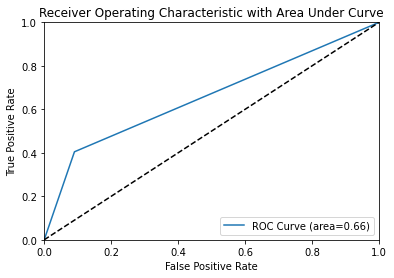

In [355]:
plt.figure()
plt.plot(fpr, tpr, label = "ROC Curve (area=%0.2f)" % logistic_roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic with Area Under Curve")
plt.legend(loc='lower right')
plt.show()

# K-Fold method (cross validation approach)

In [356]:
from sklearn.model_selection import cross_val_score
accuracy_training = cross_val_score(logit_model, X_train, y_train, cv=15)
accuracy_test = cross_val_score(logit_model, X_test, y_test, cv=15)
print(accuracy_training)
print("######"*50)
print(accuracy_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[0.66 0.74 0.84 0.74 0.68 0.76 0.76 0.84 0.8  0.62 0.88 0.76 0.8  0.68
 0.74]
############################################################################################################################################################################################################################################################################################################
[0.70588235 0.82352941 0.64705882 0.64705882 0.70588235 0.88235294
 0.70588235 0.70588235 0.58823529 0.70588235 0.75       0.625
 0.875      0.875      0.625     ]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [357]:
print("Training Accuracy :", accuracy_training[10])
print("######"*50)
print("Test Accuracy :", accuracy_test[5])

Training Accuracy : 0.88
############################################################################################################################################################################################################################################################################################################
Test Accuracy : 0.8823529411764706
